In [1]:
# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

In [2]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

In [3]:
# Splitting the dataset into the Training set and Test set
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [4]:
# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [4]:
# Fitting Decision Tree Classification to the Training set
library(rpart)
classifier = rpart(formula = Purchased ~ ., data = training_set)

In [5]:
# Predicting the Test set results. If we dont mention class type it provides the result in probabilities.
y_pred = predict(classifier, newdata = test_set[-3], type = 'class')

In [7]:
# Making the Confusion Matrix
table(test_set[, 3], y_pred)

   y_pred
     0  1
  0 53 11
  1  6 30

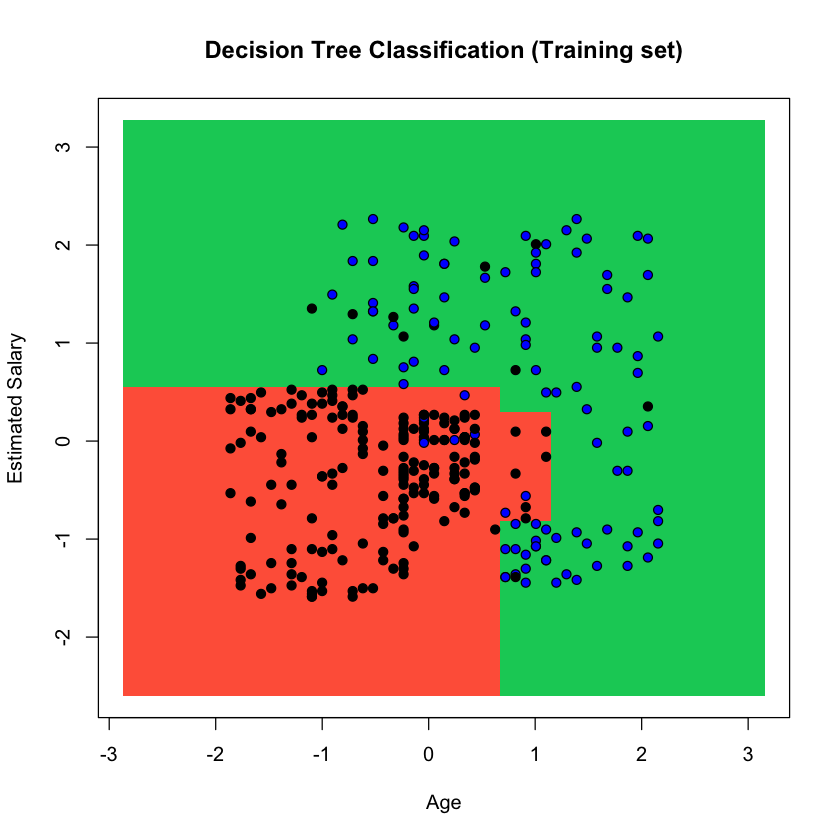

In [8]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3],
     main = 'Decision Tree Classification (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'blue', 'black'))

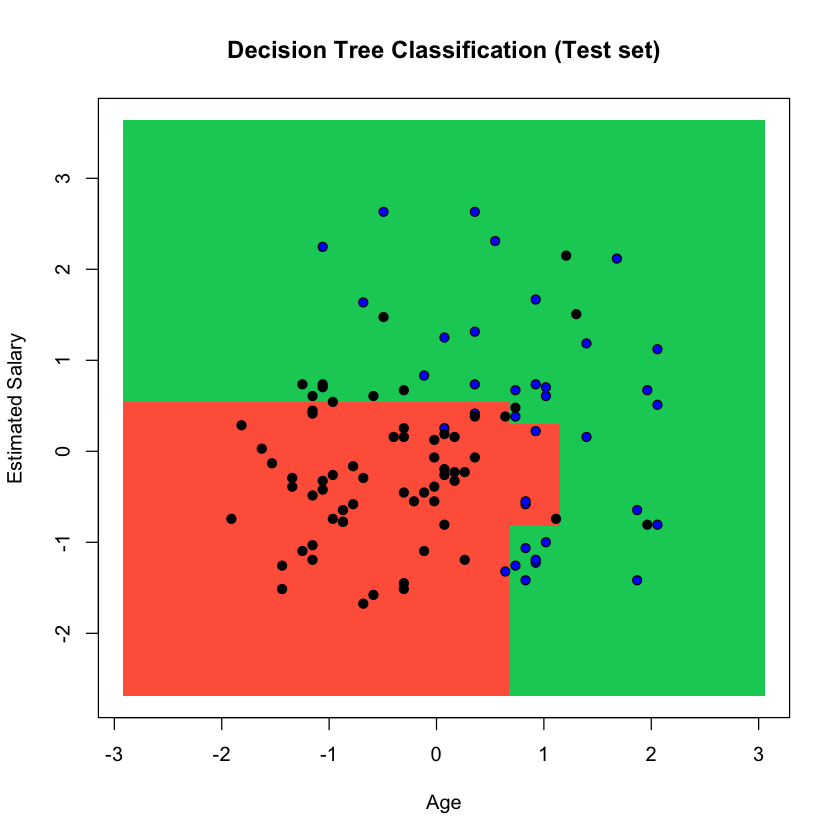

In [9]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3], main = 'Decision Tree Classification (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'blue', 'black'))

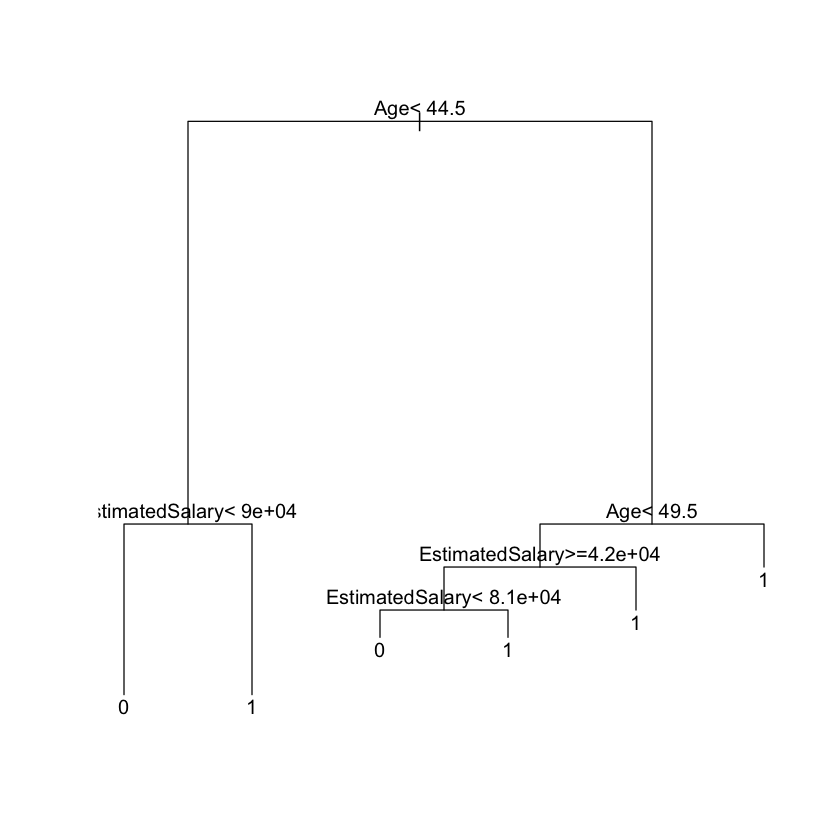

In [6]:
# Plotting the tree
plot(classifier)
text(classifier)

#### Here it doesn't overfits as python classifier 